# Processamento dos Dados

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import import_ipynb
import services.especialidades as esp

importing Jupyter notebook from C:\Users\jeanc\Documentos\GitHub\project_dataScience_POSCOMP\services\especialidades.ipynb


## POSCOMP

### Dados da Homologação do POSCOMP

In [7]:
dados_homologados = pd.read_csv('dados/homologacao_poscomp/dados_homologados.csv')

In [8]:
dados_homologados.head()

,INSCRICAO,DATA NASC.,SEXO,ESTADO,ANO
0,39401673171-6,27/10/1992,M,OU,2016
1,39401645886-1,29/11/1989,M,CE,2016
2,39401663587-8,23/02/1995,M,RS,2016
3,39401651770-6,13/12/1991,M,SP,2016
4,39401671273-0,29/09/1986,M,PA,2016


In [9]:
# elimina dados pertecentes ao Peru
dados_homologados = dados_homologados.loc[(dados_homologados['ESTADO']) != 'OU']

In [10]:
# ano = [2016,2017,2018,2019]
# dados_homologados.groupby('CARGO')['ANO'].value_counts().unstack(0).loc[ano].plot.bar()

<Axes: xlabel='ANO'>

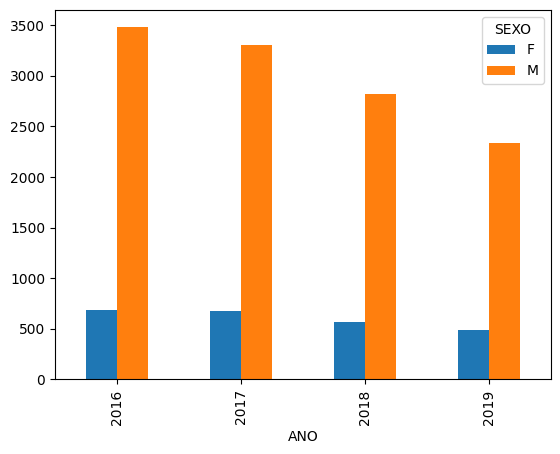

In [11]:
ano = [2016,2017,2018,2019]
dados_homologados.groupby('SEXO')['ANO'].value_counts().unstack(0).loc[ano].plot.bar()

<Axes: >

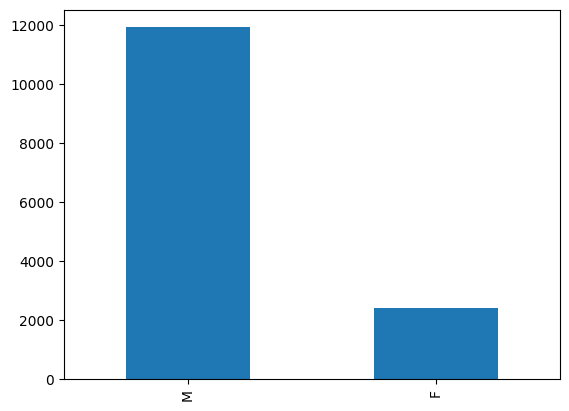

In [12]:
dados_homologados['SEXO'].value_counts().plot.bar()

In [13]:
dados_homologados = dados_homologados.set_index('INSCRICAO')

In [14]:
dados_homologados.drop(['688145', 'miamia'], inplace=True)

### Dados das Notas do POSCOMP

In [15]:
from textwrap import wrap

In [16]:
dados_notasRespostas = pd.read_csv('dados/notas_poscomp/dados_notasRespostas.csv')

In [17]:
dados_notasRespostas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79479 entries, 0 to 79478
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   INSCRICAO                                        79479 non-null  object 
 1   ESPECIALIDADE                                    78605 non-null  object 
 2   PRESENTE DIA1                                    79479 non-null  object 
 3   CARGO                                            79479 non-null  object 
 4   Matemática Discreta                              64543 non-null  float64
 5   Cálculo Diferencial e Integral                   64543 non-null  float64
 6   Álgebra Linear                                   64543 non-null  float64
 7   Geometria Analítica                              64543 non-null  float64
 8   Análise Combinatória                             64543 non-null  float64
 9   Probabilidade e Estatística 

In [18]:
dados_notasRespostas['ESPECIALIDADE'] = dados_notasRespostas['ESPECIALIDADE'].str.lower()

In [19]:
dados_notasRespostas.head()

,INSCRICAO,ESPECIALIDADE,PRESENTE DIA1,CARGO,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,Probabilidade e Estatística,...,Arquitetura e Organização de Computadores,Redes de Computadores,Computação Gráfica,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,ANO
0,39401673171-6,inteligência artificial,S,Mestrado/Doutorado,3.0,3.0,3.0,1.0,2.0,1.0,...,1.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,2.0,2016
1,39401673171-6,linhas de produto de software,S,Mestrado/Doutorado,3.0,3.0,3.0,1.0,2.0,1.0,...,1.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,2.0,2016
2,39401673171-6,"computação gráfica, processamento de imagens, ...",S,Mestrado/Doutorado,3.0,3.0,3.0,1.0,2.0,1.0,...,1.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,2.0,2016
3,39401673171-6,inteligência computacional,S,Mestrado/Doutorado,3.0,3.0,3.0,1.0,2.0,1.0,...,1.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,2.0,2016
4,39401673171-6,inteligência artificial,S,Mestrado/Doutorado,3.0,3.0,3.0,1.0,2.0,1.0,...,1.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,2.0,2016


In [20]:
#dados_candidatosNotas = dados_notasRespostas.loc[~dados_notasRespostas['INSCRICAO'].
                                                    #isin(dados_homologadosPA['INSCRICAO'])].reset_index(drop=True)

In [21]:
dados = (dados_notasRespostas['PRESENTE DIA1'] == 'S') & (dados_notasRespostas['CARGO'] == 'Mestrado/Doutorado')

In [22]:
dados_world = dados_notasRespostas[dados]

In [23]:
dados_world['ESPECIALIDADE'].value_counts(ascending=False)

engenharia de software                                                                                                4581
inteligência computacional                                                                                            4287
inteligência artificial                                                                                               2951
sistemas de computação                                                                                                2316
sistemas de informação                                                                                                1677
                                                                                                                      ... 
lógica nebulosa                                                                                                          1
teoria, lógica e métodos formais                                                                                         1
banco de dados d

In [24]:
especialidades_alt = {'redes de computadores\xa0\xa0': 'redes de computadores',
         'inteligência computacional\xa0\xa0': 'inteligência computacional',
        'modelos\xa0neurais artificiais': 'modelos neurais artificiais',
         'engenharia de\xa0sistemas\xa0computacionais': 'engenharia de sistemas computacionais',
         'verificação e \xa0validação': 'verificação e validação',
        }
dados_world = dados_world.replace({'ESPECIALIDADE': especialidades_alt})

In [25]:
dados_world = dados_world.replace({'ESPECIALIDADE': esp.especialidades})

In [26]:
# def alt_especialidade(lista_especialidade):
#     for especialidade in lista_especialidade:
        

In [28]:
dados_world['ESPECIALIDADE'].sort_values().value_counts()

inteligência artificial                                                                                               8915
engenharia de software                                                                                                5046
sistemas de computação                                                                                                2518
sistemas de informação                                                                                                1770
banco de dados                                                                                                        1505
                                                                                                                      ... 
contratos eletrônicos                                                                                                    1
sistemas operacionais avançados                                                                                          1
model driven arc

In [31]:
f = dados_world[dados_world['ESPECIALIDADE'].str.contains('engenharia de')]
f['ESPECIALIDADE'].sort_values().value_counts()
# list(f['ESPECIALIDADE'].unique())

engenharia de software                                                                        5046
engenharia de software e sistemas de informação/sistemas web e multimídia interativos          495
engenharia de software e linguagens de programação                                             437
engenharia de software e banco de dados                                                        353
ciência de dados e engenharia de software                                                      306
engenharia de software, gerenciamento de informações e interfaces homem-computador             300
engenharia de software, banco de dados e informática e educação                                241
engenharia de software e sistemas de informação                                                224
engenharia de software, banco de dados e interação humano computador                           198
engenharia de software e sistemas de informação / sistemas web e multimídia interativos        176
engenharia

In [ ]:
# list(dados_world['ESPECIALIDADE'].unique())

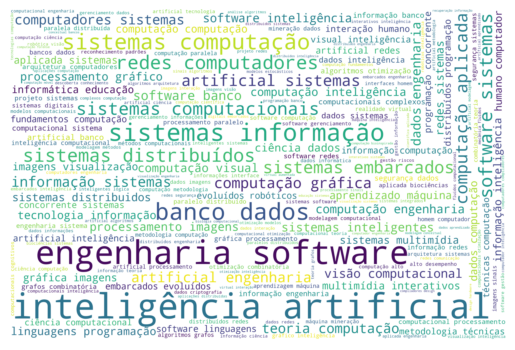

In [41]:
# Libraries
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Create a list of word
text = dados_world['ESPECIALIDADE'].tolist()


# Create the wordcloud object
wordcloud2 = WordCloud(width=3000, height=2000, 
                       background_color="white", 
                       random_state=1, 
                       min_word_length=4).generate(' '.join(dados_world['ESPECIALIDADE']))
# WordCloud.generate_from_frequencies

# Display the generated image:
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('imagens/nuvem_palavras.png', format='png', dpi = 300, bbox_inches='tight')
plt.show()

In [ ]:
# #Metodo para geração de palavras
# def generate_word_cloud(researcher):
#     fig1, ax1 = plt.subplots()
#     portuguese_stop_words = list(nltk.corpus.stopwords.words('portuguese'))
#     english_stop_words = list(wordcloud.STOPWORDS)
#     stop_words = portuguese_stop_words + english_stop_words
#     word_cloud = WordCloud(
#         width=3000,
#         height=2000,
#         random_state=1,
#         background_color="salmon",
#         colormap="Pastel1",
#         collocations=False,
#         stopwords=stop_words,
#         min_word_length=2
#     ).generate(researcher.words)

#     plt.title('Nuvem de Palavra de todos os Trabalhos e Artigos')
#     plt.imshow(word_cloud)
#     plt.axis("off")

#     return fig1

### Realizar estudos por Regiões do Brasil

In [ ]:
dados_homologados_cp = dados_homologados.copy()

In [ ]:
dados_homologados['ESTADO'].unique()

In [ ]:
import services.lista_estados_regioes as lesr

In [ ]:
#Aqui estou adicionando as regioes dos estados brasileiros
for i in lesr.regioes_brasil_siglas:
    dados_homologados_cp.loc[dados_homologados_cp['ESTADO'].isin(lesr.regioes_brasil_siglas[i]), 'REGIAO'] = i

In [ ]:
dados_homologados_cp1 = dados_homologados_cp.dropna()

In [ ]:
dados_homologados_cp1

In [ ]:
grupo_regiao = dados_homologados_cp.groupby('REGIAO')

In [ ]:
plt.hist(dados_homologados_cp1['REGIAO'])
plt.show()

In [ ]:
regioes = dados_homologados_cp1['REGIAO'].value_counts()
regioes

In [ ]:

# create data: an array of values
# size_of_groups=[12,11,3,30]
labels = ['Sudeste', 'Sul', 'Nordeste', 'Centro-Oeste', 'Norte']

# Create a pieplot
plt.pie(regioes, labels=labels)
plt.show()

### Converter as data de nascimento por idade

In [ ]:
from datetime import datetime, date

# dados_homologados_cp1.head()
dados_teste_idade = dados_homologados_cp1.copy()
dados_teste_idade['IDADE'] = dados_teste_idade['DATA NASC.'].apply(age)

In [ ]:
dados_teste_idade.head()

In [ ]:
today = date.today()
today

In [ ]:
def age(idade):
    idade = datetime.strptime(idade, "%d/%m/%Y").date()
    today = date.today()
    return today.year - idade.year - ((today.month, today.day) < (idade.month, idade.day))

# df['Age'] = df['DOB'].apply(age)

### Juntar os dataframes

In [ ]:
dados_homologados_cp1.shape

In [ ]:
dados_notasRespostas[dados_notasRespostas['INSCRICAO'] == '51801392508-5']

In [ ]:
# s = dados_notasRespostas['INSCRICAO'].drop_duplicates()
# s
# dados_candidatosNotas = dados_homologados.loc[~dados_homologados['INSCRICAO'].
#                                                  isin(dados_notasRespostas['INSCRICAO'])].reset_index(drop=True)

In [ ]:
dados_homologados_cp1.info()
dados_homologados_cp1 = dados_homologados_cp1.drop(columns=['ANO'])

In [ ]:
# dados_respostas.info()
# dados_respostas = dados_respostas.drop(columns=['ANO'])

In [ ]:
dados_notasRespostas.info()

In [ ]:
dataset_juntos = pd.merge(dados_homologados_cp1, dados_notasRespostas, how='inner', on='INSCRICAO')

In [ ]:
dataset_juntos.shape

In [ ]:
dataset_juntos = dataset_juntos.replace({'ESPECIALIDADE': especialidades_alt})

In [ ]:
dataset_juntos = dataset_juntos.set_index('INSCRICAO')

In [ ]:
dataset_juntos['ESPECIALIDADE'].unique()

### Salvar os dados

In [ ]:
dataset_juntos.to_csv('dados/dataset_poscomp.csv')

In [ ]:
#dados_notasRespostas.to_csv('dados/notas_poscomp/dados_notasRespostas.csv')